# 📊 Business Intelligence Dashboard
**Automated insights for data-driven decisions**

In [17]:
# input_file = 'data/auto_partes/auto_partes_transactions.csv'  # Input CSV file
input_file = 'data/bookstore/bookstore_transactions.csv'  # Input CSV file

config = {
    'project_name': 'bookstore',       # Project name
    'out_dir' : 'outputs',               # Output directory
    
    # Data mapping
    'date_col': 'fecha',
    'product_col': 'producto',
    'description_col': 'glosa',
    'revenue_col': 'total',
    'quantity_col': 'cantidad',
    'transaction_col': 'trans_id',
    'cost_col': 'costo',    
    
    # Analysis settings
    'analysis_date': '2024-05-01',      # Or 'current' for today
    'top_products_threshold': 0.2,
    'dead_stock_days': 30,
    'currency_format': 'CLP',
    'language': 'EN',
}

save = False  # True to save outputs, False to just print

In [18]:
from modules.business_analytics import BusinessAnalyzer
from modules.dashboard import ExecutiveDashboard
from modules.advanced_analytics import AdvancedAnalytics
from modules.reports import *
from modules.utils import *

# Initialize with AdvancedAnalytics (includes all functionality)
# AdvancedAnalytics -> BusinessAnalyzer -> Business (inheritance chain)
analyzer = BusinessAnalyzer(data_source=input_file, config=config)

# Create dashboard and advanced analytics instances
dashboard = ExecutiveDashboard(analyzer)
advanced = AdvancedAnalytics(analyzer)

Data date range: 2024-03-01 to 2024-04-30
Business initialized with data from: data/bookstore/bookstore_transactions.csv (5211, 14)
Output directory: outputs\bookstore\20251001_2002
✓ All base metrics calculated
BusinessAnalyzer initialized for project: bookstore
Dashboard output directory: outputs\bookstore\20251001_2002
AdvancedAnalytics initialized for project: bookstore


## 🎯 Quick Summary

In [19]:
summary = dashboard.create_quick_summary()
print_info(summary, analyzer.out_dir, "DASH_quick_summary.txt", save=save)

DASHBOARD SUMMARY

📊 KEY METRICS:
  • Total Revenue: $ 275.022.600
  • Growth Rate: -0.8%
  • Transactions: 5,211

🔴 CRITICAL ACTIONS:
  • 1 products haven't sold in 30+ days
    → Consider liquidation or promotional campaigns

💡 KEY INSIGHTS:
  • Top 20% of products = 90.9% of revenue
  • Inventory Health: 33% healthy
  • Dead Stock: 0 products



## 📊 KPIs

In [20]:
kpis = analyzer.get_kpis()
print_info(analyzer.print_kpis(), analyzer.out_dir, "BA_kpi.txt", save=save)


📅 Periods considered for growth:
  • Previous: 2024-03-01 -> 2024-03-31
  • Current:  2024-03-31 -> 2024-04-30
📈 Growth: -0.8%

💰 Revenue: $ 275.022.600
🛒 Transactions: 5,211


## 🚨 Alerts & Actions

In [21]:
alerts = analyzer.get_alerts()
print_info(analyzer.print_alerts(), analyzer.out_dir, "BA_alerts.txt", save=save)

🔴 CRITICAL ACTIONS REQUIRED:

  1 products haven't sold in 30+ days
  Impact: Cash tied up in non-moving inventory
  ➔ Action: Consider liquidation or promotional campaigns

🟡 WARNINGS:

  Top 20% of products generate 90.9% of revenue
  ➔ Action: Diversify product portfolio


## 💰 Revenue Concentration Analysis

In [22]:
pareto = analyzer.get_pareto_insights()
print_info(analyzer.print_pareto(), analyzer.out_dir, "BA_pareto.txt", save=save)

🎯 TOP INSIGHT: Your top 6 products (20% of catalog) generate 90.9% of revenue!

Concentration Risk Level: High

📋 Top 5 Revenue Generators:
  1. FISICA UNIVERSITARIA SEARS ED.2024: $ 57.138.000
  2. CALCULO DIFERENCIAL STEWART ED.2024: $ 55.380.000
  3. QUIMICA GENERAL CHANG ED.2024: $ 38.704.000
  4. DERECHO CIVIL ALESSANDRI ED.2024: $ 34.865.000
  5. CONTABILIDAD FINANCIERA HORNGREN ED.2024: $ 34.056.000

📊 80/20 Rule: Top 20% = 90.9% of revenue


## 📦 Inventory Health Check

In [23]:
inventory = analyzer.get_inventory_health()
print_info(analyzer.print_inventory_health(), analyzer.out_dir, "BA_inventory.txt", save=save)

📊 Inventory Health Score: 33%

⚠️ Dead Stock Alert: 0 products

🟡 Products At Risk (Slowing):
  • CALCULO DIFERENCIAL STEWART ED.2022: 49.0 days since last sale


## ⏰ Operational Efficiency

In [24]:
peak_times = analyzer.get_peak_times()
print_info(analyzer.print_peak_times(), analyzer.out_dir, "BA_peak_times.txt", save=save)

⏰ Peak Performance Windows:
  • Best Day: Thursdays
  • Peak Hour: 12:00
  • Slowest Day: Sundays

💡 Optimize staffing for Thursdays around 12:00


# Visuals

## 📊 Executive Dashboard

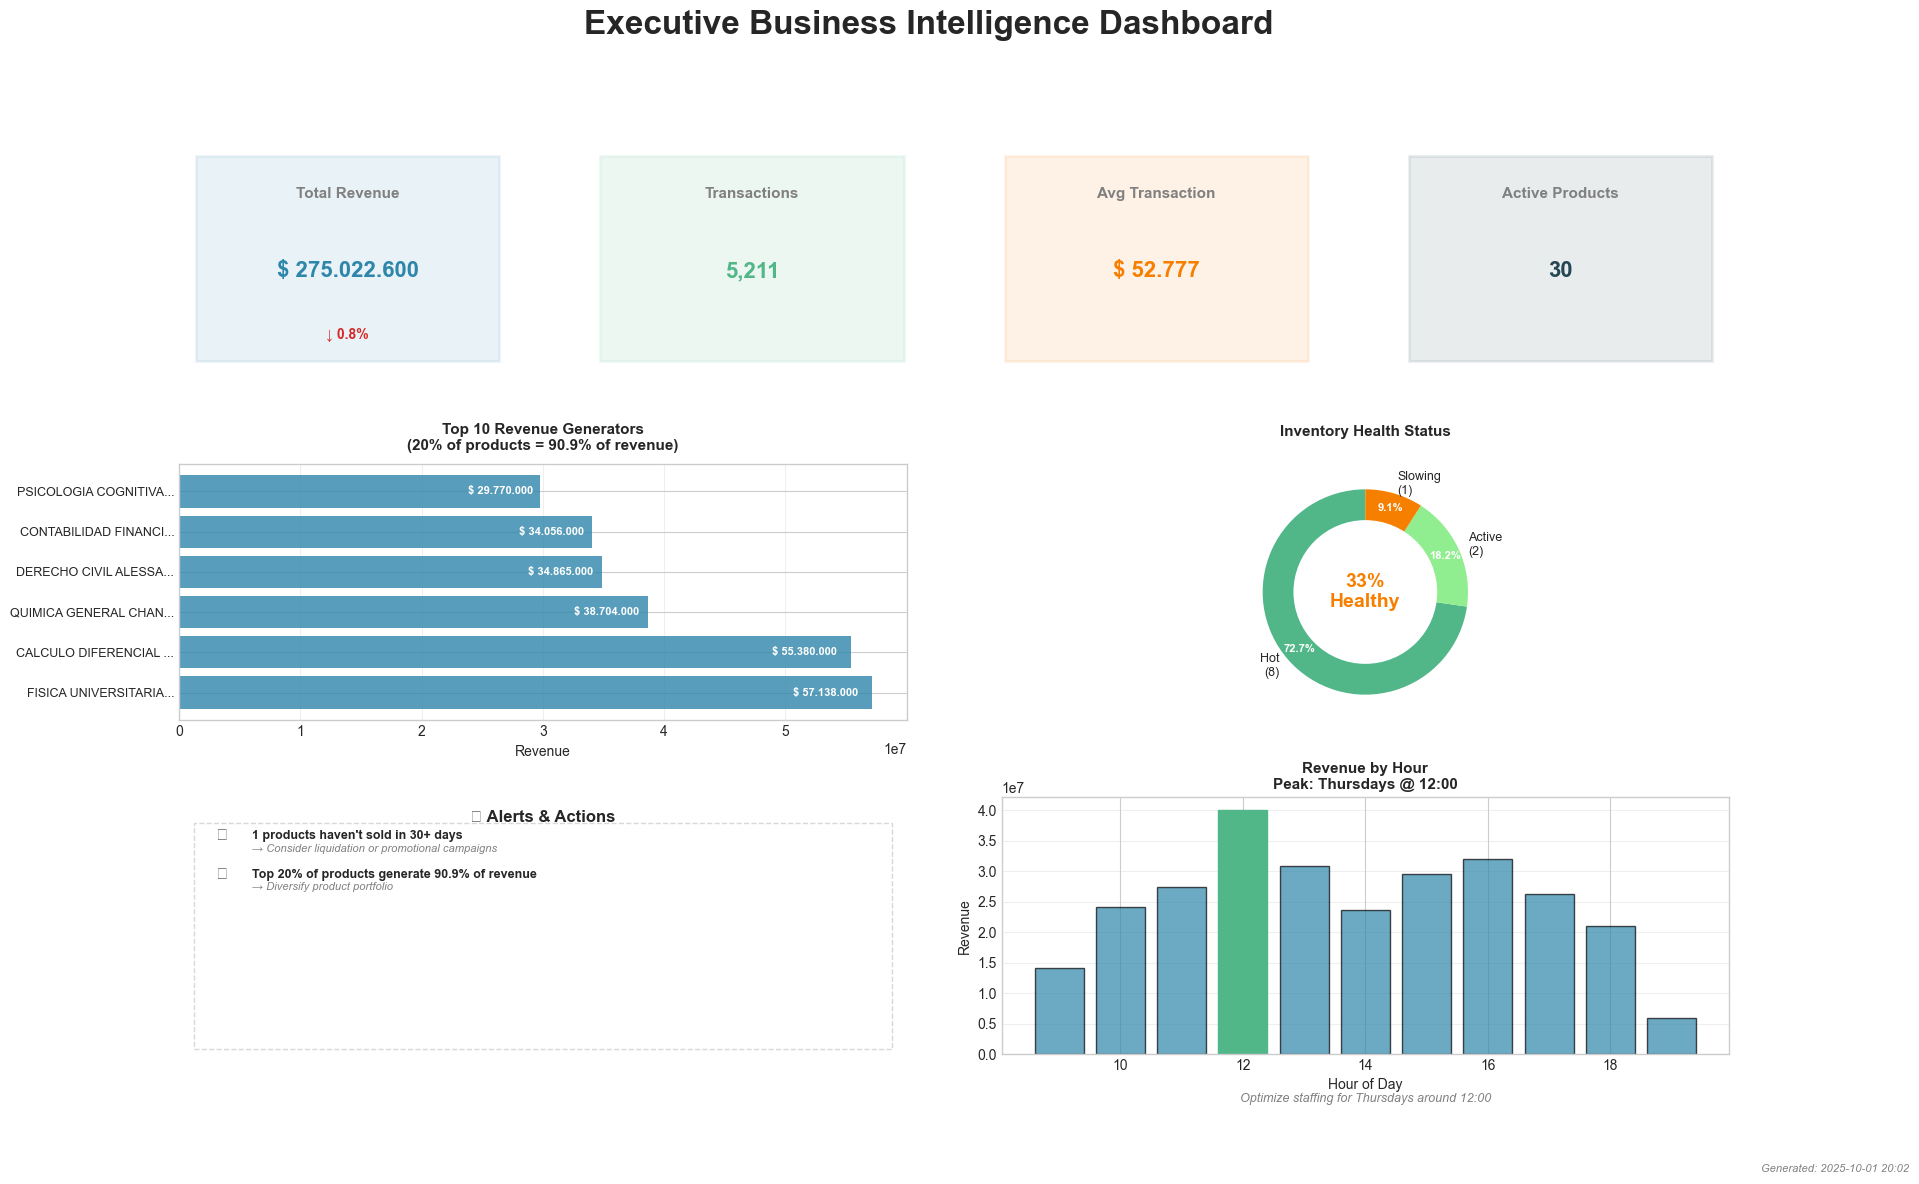

In [25]:
# Create and display the executive dashboard
fig = dashboard.create_full_dashboard(figsize=(20, 12))
print_fig(fig, dashboard.analyzer.out_dir, "DASH_executive.png", save=save)

## 📈 Trend analysis

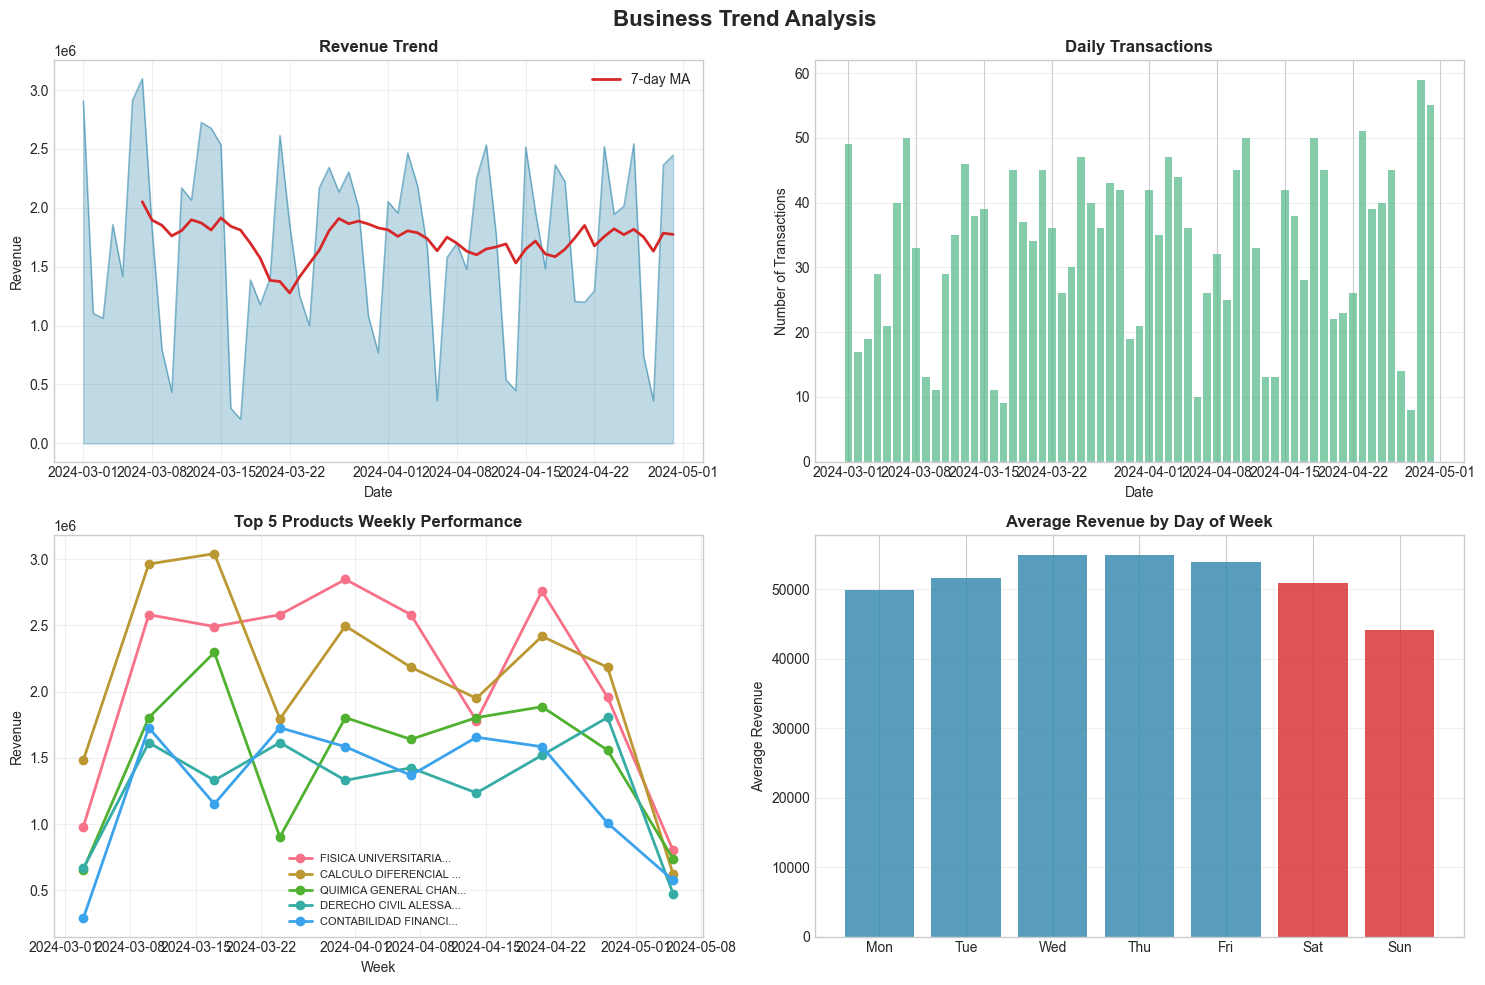

In [26]:
trend_fig = advanced.create_trend_analysis(figsize=(15, 10))
print_fig(trend_fig, dashboard.analyzer.out_dir, "DASH_trend.png", save=save)

## Product velocity

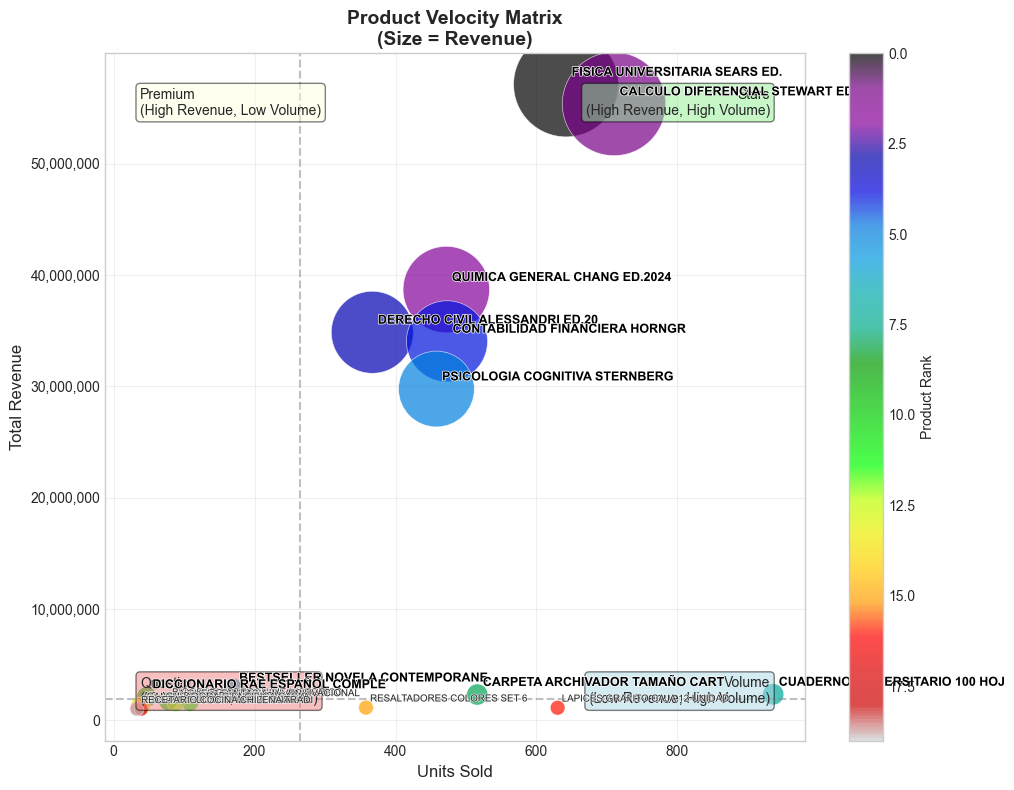

In [27]:
velocity_fig = product_velocity_matrix(analyzer)
print_fig(velocity_fig, dashboard.analyzer.out_dir, "DASH_velocity.png", save=save)

# Advanced Analytics

## 📈 Forecast

In [28]:
forecast = advanced.calculate_revenue_forecast(days_ahead=30)
print_info(advanced.print_revenue_forecast(), analyzer.out_dir, "ADV_forecast.txt", save=save)

📈 Revenue Forecast for next 30 days:
 Daily:
 - Average: $ 1.774.386
 - Std Dev: $ 754.082
 - 95% Confidence Interval: ($ 296.386, $ 3.252.386)
 Total:
 - Forecast: $ 53.231.571
 - 95% Confidence Interval: ($ 8.891.573, $ 97.571.570)
 - Trend: Increasing


## 🛍️ Cross-sell opportunities

In [29]:
cross_sell = advanced.calculate_cross_sell_opportunities(limit=3)
print_info(advanced.print_cross_sell_opportunities(), analyzer.out_dir, "ADV_cross_selling.txt", save=save)

ℹ️ No significant cross-sell opportunities found.


## ⚠️ Anomalies

In [30]:
anomalies = advanced.calculate_anomalies(limit=3)
print_info(advanced.print_anomalies(), analyzer.out_dir, "ADV_anomalies.txt", save=save)

ℹ️ No anomalies detected.


## 💡 Top Recommmendations

In [31]:
recommendations = advanced.calculate_recommendations()
print_info(advanced.print_recommendations(), analyzer.out_dir, "ADV_recommendations.txt", save=save)


💡 TOP RECOMMENDATIONS:

1. [HIGH] Diversify Revenue Sources
   Your top 20% of products generate 90.9% of revenue
   Action: Develop marketing campaigns for mid-tier products to reduce concentration risk
   Impact: Reduce business risk by 30% | Timeline: 3 months


# Reports

## Weekly Comparison Report

In [32]:
weekly_comparison_report = weekly_comparison_report(analyzer)
print_info(weekly_comparison_report, analyzer.out_dir, "REPORTS_weekly_compare.txt", save=save)

WEEKLY COMPARISON REPORT

Revenue:
  Last Week:     $ 4.812.000
  Previous Week: $ 11.426.100
  Change:        🔴 ↓ 57.89%

Transactions:
  Last Week:     114
  Previous Week: 223
  Change:        🔴 ↓ 48.88%

Products Sold:
  Last Week:     22
  Previous Week: 21
  Change:        🟢 ↑ 4.76%

Avg Transaction:
  Last Week:     $ 42.211
  Previous Week: $ 51.238
  Change:        🔴 ↓ 17.62%
